<a href="https://colab.research.google.com/github/abhishekmishra-bareilly/Deep-Learning/blob/main/Vanishing_Gradient_Problem.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
# Import the dependancyes
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import tensorflow as tf
import keras
from sklearn.datasets import make_moons
from sklearn.model_selection import train_test_split
from keras.layers import Dense
from keras.models import Sequential

## Data overview

In [36]:
# Creating the dataset
X,y = make_moons(n_samples=250, noise=0.05, random_state=42)

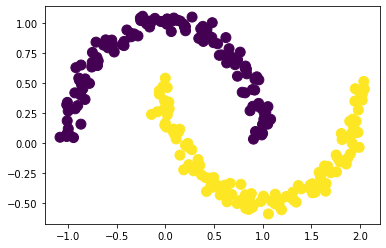

In [37]:
# Ploting the dtaset
plt.scatter(X[:,0],X[:,1], c=y, s=100)
plt.show()

In [38]:
x_train, x_test, y_train, y_test = train_test_split(X, y, test_size=0.20, random_state=42)

## Model implimentation

In [39]:
model = Sequential()

# Creating layers
model.add(Dense(10,activation='sigmoid',input_dim=2))
model.add(Dense(10,activation='sigmoid'))
model.add(Dense(10,activation='sigmoid'))
model.add(Dense(10,activation='sigmoid'))
model.add(Dense(10,activation='sigmoid'))
model.add(Dense(10,activation='sigmoid'))
model.add(Dense(10,activation='sigmoid'))
model.add(Dense(10,activation='sigmoid'))
model.add(Dense(10,activation='sigmoid'))
model.add(Dense(1, activation='sigmoid'))

In [56]:
# Model complilation
model.compile(loss='binary_crossentropy',optimizer='adam',metrics=['accuracy'])

In [57]:
# Checking weights for one node
old_weights = model.get_weights()[0]
old_weights

array([[ 0.30928987, -0.6163454 , -0.37735522, -0.00780189, -0.45092878,
         0.57029456, -0.44937575, -0.04663432, -0.64210737,  0.5772185 ],
       [ 0.15312773, -0.4873752 ,  0.69215447, -0.17529011, -0.34669828,
        -0.52563274,  0.64939815,  0.38112026, -0.2836623 , -0.5223183 ]],
      dtype=float32)

In [58]:
# Fitting the model
model.fit(x_train, y_train, epochs = 100)

Epoch 1/100
7/7 [==============================] - 1s 2ms/step - loss: 0.7553 - accuracy: 0.5100
Epoch 2/100
7/7 [==============================] - 0s 4ms/step - loss: 0.7449 - accuracy: 0.5100
Epoch 3/100
7/7 [==============================] - 0s 2ms/step - loss: 0.7361 - accuracy: 0.5100
Epoch 4/100
7/7 [==============================] - 0s 2ms/step - loss: 0.7292 - accuracy: 0.5100
Epoch 5/100
7/7 [==============================] - 0s 3ms/step - loss: 0.7218 - accuracy: 0.5100
Epoch 6/100
7/7 [==============================] - 0s 3ms/step - loss: 0.7158 - accuracy: 0.5100
Epoch 7/100
7/7 [==============================] - 0s 2ms/step - loss: 0.7110 - accuracy: 0.5100
Epoch 8/100
7/7 [==============================] - 0s 3ms/step - loss: 0.7066 - accuracy: 0.5100
Epoch 9/100
7/7 [==============================] - 0s 2ms/step - loss: 0.7032 - accuracy: 0.5100
Epoch 10/100
7/7 [==============================] - 0s 3ms/step - loss: 0.7001 - accuracy: 0.5100
Epoch 11/100
7/7 [===========

In [59]:
# Checking new weights
new_weights = model.get_weights()[0]
new_weights

array([[ 0.65192735, -1.1870135 , -0.10655801, -0.5716779 , -1.0788213 ,
         1.2973782 , -1.0671154 ,  0.54605705,  0.09687218,  0.701972  ],
       [-0.39345062,  0.34052783,  0.42223054,  0.57564855,  0.52805233,
        -1.5735439 ,  1.556013  , -0.41266882, -1.1315026 , -0.7949759 ]],
      dtype=float32)

In [60]:
# Check for learning rate
model.optimizer.get_config()["learning_rate"]

0.001

In [61]:
# Check for gradiant decent, how much change happens b/w old weights and new weights
gradiant = (old_weights - new_weights)/0.001

# Checking pracentage change b/w old and new
percent_change = abs(100*(old_weights - new_weights)/ old_weights)

In [62]:
gradiant

array([[-342.63745,  570.6681 , -270.79718,  563.876  ,  627.89246,
        -727.0836 ,  617.7396 , -592.69135, -738.97955, -124.75353],
       [ 546.5783 , -827.903  ,  269.92392, -750.9386 , -874.75055,
        1047.9111 , -906.6148 ,  793.78906,  847.8403 ,  272.65756]],
      dtype=float32)

In [63]:
percent_change

array([[ 110.78199 ,   92.58901 ,   71.76188 , 7227.428   ,  139.24428 ,
         127.49264 ,  137.46619 , 1270.934   ,  115.0866  ,   21.612879],
       [ 356.94275 ,  169.86975 ,   38.997643,  428.3976  ,  252.30888 ,
         199.36185 ,  139.60847 ,  208.27785 ,  298.89072 ,   52.20142 ]],
      dtype=float32)

# handling Vanishing Gradient Problem
**1. reduce model complexity**


In [75]:
model = Sequential()

# Creating layers and using 3 nodes
model.add(Dense(10,activation='sigmoid',input_dim=2))
model.add(Dense(10,activation='sigmoid'))
model.add(Dense(10,activation='sigmoid'))
model.add(Dense(1, activation='sigmoid'))

In [76]:
# Model complilation
model.compile(loss='binary_crossentropy',optimizer='adam',metrics=['accuracy'])

In [77]:
# Checking weights for one node
old_weights = model.get_weights()[0]
old_weights

array([[ 0.0248363 ,  0.11725992, -0.6529693 ,  0.4392969 ,  0.46697897,
        -0.26372615, -0.6792155 ,  0.37886125, -0.53285027,  0.16472507],
       [-0.24124452, -0.12998646, -0.17203283,  0.32479757,  0.04159421,
        -0.23791304,  0.50694233, -0.06332159, -0.2504971 , -0.3037402 ]],
      dtype=float32)

In [78]:
# Fitting the model
model.fit(x_train, y_train, epochs = 100)

Epoch 1/100
7/7 [==============================] - 1s 3ms/step - loss: 0.6972 - accuracy: 0.4900
Epoch 2/100
7/7 [==============================] - 0s 3ms/step - loss: 0.6946 - accuracy: 0.4900
Epoch 3/100
7/7 [==============================] - 0s 3ms/step - loss: 0.6937 - accuracy: 0.4900
Epoch 4/100
7/7 [==============================] - 0s 6ms/step - loss: 0.6926 - accuracy: 0.4900
Epoch 5/100
7/7 [==============================] - 0s 3ms/step - loss: 0.6918 - accuracy: 0.4950
Epoch 6/100
7/7 [==============================] - 0s 3ms/step - loss: 0.6911 - accuracy: 0.5850
Epoch 7/100
7/7 [==============================] - 0s 3ms/step - loss: 0.6905 - accuracy: 0.6300
Epoch 8/100
7/7 [==============================] - 0s 3ms/step - loss: 0.6900 - accuracy: 0.5150
Epoch 9/100
7/7 [==============================] - 0s 3ms/step - loss: 0.6895 - accuracy: 0.5100
Epoch 10/100
7/7 [==============================] - 0s 3ms/step - loss: 0.6890 - accuracy: 0.5250
Epoch 11/100
7/7 [===========

In [86]:
# Checking new weights
new_weights = model.get_weights()[0]
new_weights

array([[ 0.5829613 ,  0.64498746, -0.94154996,  0.914729  , -0.02602394,
        -0.75764847, -0.7794273 ,  0.87162524, -0.97726905,  0.75702125],
       [-1.1809227 , -1.0952274 ,  0.66667587, -0.5858307 ,  0.7923657 ,
         0.663388  ,  1.1374056 , -1.0514305 ,  0.68152285, -1.412477  ]],
      dtype=float32)

In [87]:
# Check for learning rate
model.optimizer.get_config()["learning_rate"]

0.001

In [88]:
# Check for gradiant decent, how much change happens b/w old weights and new weights
gradiant = (old_weights - new_weights)/0.001

# Checking pracentage change b/w old and new
percent_change = abs(100*(old_weights - new_weights)/ old_weights)

In [89]:
gradiant

array([[-558.125  , -527.72754,  288.58063, -475.43207,  493.0029 ,
         493.9223 ,  100.21179, -492.76398,  444.41876, -592.29614],
       [ 939.67816,  965.24084, -838.7087 ,  910.62823, -750.7714 ,
        -901.30096, -630.46326,  988.1088 , -932.0199 , 1108.7367 ]],
      dtype=float32)

In [90]:
percent_change

array([[2247.2146  ,  450.04938 ,   44.195137,  108.225685,  105.57283 ,
         187.28606 ,   14.754051,  130.0645  ,   83.40407 ,  359.56653 ],
       [ 389.51276 ,  742.5703  ,  487.5283  ,  280.36795 , 1804.9905  ,
         378.83633 ,  124.36588 , 1560.4613  ,  372.06815 ,  365.02798 ]],
      dtype=float32)

In [91]:
old_weights

array([[ 0.0248363 ,  0.11725992, -0.6529693 ,  0.4392969 ,  0.46697897,
        -0.26372615, -0.6792155 ,  0.37886125, -0.53285027,  0.16472507],
       [-0.24124452, -0.12998646, -0.17203283,  0.32479757,  0.04159421,
        -0.23791304,  0.50694233, -0.06332159, -0.2504971 , -0.3037402 ]],
      dtype=float32)

In [92]:
new_weights

array([[ 0.5829613 ,  0.64498746, -0.94154996,  0.914729  , -0.02602394,
        -0.75764847, -0.7794273 ,  0.87162524, -0.97726905,  0.75702125],
       [-1.1809227 , -1.0952274 ,  0.66667587, -0.5858307 ,  0.7923657 ,
         0.663388  ,  1.1374056 , -1.0514305 ,  0.68152285, -1.412477  ]],
      dtype=float32)

**2. Using relu activation function**

In [109]:
model = Sequential()

# Creating layers and using relu
model.add(Dense(10,activation='relu',input_dim=2))
model.add(Dense(10,activation='relu'))
model.add(Dense(10,activation='relu'))
model.add(Dense(10,activation='relu'))
model.add(Dense(10,activation='relu'))
model.add(Dense(10,activation='relu'))
model.add(Dense(10,activation='relu'))
model.add(Dense(10,activation='relu'))
model.add(Dense(10,activation='relu'))
model.add(Dense(10,activation='relu'))
model.add(Dense(10,activation='relu'))
model.add(Dense(1, activation='sigmoid'))

In [110]:
# Model complilation
model.compile(loss='binary_crossentropy',optimizer='adam',metrics=['accuracy'])

In [111]:
# Checking weights for one node
old_weights = model.get_weights()[0]

In [112]:
# Fitting the model
model.fit(x_train, y_train, epochs = 100)

Epoch 1/100
7/7 [==============================] - 1s 4ms/step - loss: 0.6922 - accuracy: 0.4900
Epoch 2/100
7/7 [==============================] - 0s 4ms/step - loss: 0.6878 - accuracy: 0.6350
Epoch 3/100
7/7 [==============================] - 0s 4ms/step - loss: 0.6821 - accuracy: 0.8600
Epoch 4/100
7/7 [==============================] - 0s 4ms/step - loss: 0.6739 - accuracy: 0.8850
Epoch 5/100
7/7 [==============================] - 0s 6ms/step - loss: 0.6633 - accuracy: 0.8900
Epoch 6/100
7/7 [==============================] - 0s 4ms/step - loss: 0.6482 - accuracy: 0.8650
Epoch 7/100
7/7 [==============================] - 0s 4ms/step - loss: 0.6278 - accuracy: 0.8950
Epoch 8/100
7/7 [==============================] - 0s 4ms/step - loss: 0.6021 - accuracy: 0.8750
Epoch 9/100
7/7 [==============================] - 0s 4ms/step - loss: 0.5697 - accuracy: 0.8900
Epoch 10/100
7/7 [==============================] - 0s 3ms/step - loss: 0.5288 - accuracy: 0.8950
Epoch 11/100
7/7 [===========

In [113]:
# Checking new weights
new_weights = model.get_weights()[0]

In [114]:
# Check for learning rate
model.optimizer.get_config()["learning_rate"]

0.001

In [115]:
# Check for gradiant decent, how much change happens b/w old weights and new weights
gradiant = (old_weights - new_weights)/0.001

# Checking pracentage change b/w old and new
percent_change = abs(100*(old_weights - new_weights)/ old_weights)

In [116]:
gradiant

array([[ 228.9445   ,  -15.94591  ,   22.486523 ,  -59.03479  ,
         203.67908  ,  -60.876247 ,  142.60312  ,    4.6119876,
         -50.896164 ,   -8.585899 ],
       [   3.5141108,  -27.986942 ,    5.066484 , -112.56903  ,
         -79.217575 ,   54.713066 ,  -99.29427  ,  -38.371918 ,
          78.20636  ,   15.886544 ]], dtype=float32)

In [117]:
percent_change

array([[9.7469681e+01, 2.4649472e+00, 8.4872522e+00, 4.3531746e+01,
        2.1881526e+02, 1.0444255e+01, 1.8851218e+03, 7.5561695e+00,
        8.7372007e+00, 3.1681104e+00],
       [5.9621727e-01, 4.8183675e+00, 2.6032612e+00, 2.0654062e+01,
        7.4144203e+01, 8.1462517e+00, 1.9132908e+01, 1.6236271e+01,
        2.2761845e+01, 2.6950395e+00]], dtype=float32)

In [118]:
old_weights

array([[-0.23488793,  0.6469068 ,  0.26494467,  0.1356132 , -0.09308267,
         0.5828683 , -0.00756466,  0.06103605,  0.5825226 , -0.27101013],
       [ 0.58940107,  0.58083874, -0.19462067, -0.5450213 , -0.10684258,
         0.67163485, -0.51897115,  0.23633456, -0.3435853 ,  0.58947355]],
      dtype=float32)

In [119]:
new_weights

array([[-0.46383244,  0.6628527 ,  0.24245815,  0.194648  , -0.29676175,
         0.6437445 , -0.1501678 ,  0.05642406,  0.63341874, -0.26242423],
       [ 0.58588696,  0.6088257 , -0.19968715, -0.43245226, -0.027625  ,
         0.6169218 , -0.41967687,  0.27470648, -0.42179167,  0.573587  ]],
      dtype=float32)

**3. Proper weight enitilization**

**4. Batch normalization**

**5. Using redual network**